In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.pardir, os.pardir, os.pardir)))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lin3ar.regression import LinearRegression

df = pd.read_csv("./crabs.csv")

In [2]:
from lin3ar.preprocessing import standard_scale

# preparing df & vars to test lambdas
df = pd.get_dummies(df, columns=['Plec'], drop_first=True)

X = df[["Plec_I", "Plec_M", "Dlugosc", "Srednica", "Wysokosc", "Waga", "Waga BS", "Waga WN", "Waga SK"]].astype(float)
y = df[["Wiek"]].astype(float)

cols_to_scale = ["Dlugosc", "Srednica", "Wysokosc", "Waga", "Waga BS", "Waga WN", "Waga SK"]

X[cols_to_scale] = standard_scale(X[cols_to_scale])
y = y.squeeze() # y is dataframe, converting to series to pass it to evaluation

In [3]:
ratio = 0.8
split_index = int(round(X.shape[0] * ratio, 0))

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

### Experiment 1: Lambda vs weights

In [4]:
lambdas = [0.0, 0.01, 0.1, 1.0, 10]
weights_list = []

In [5]:
for lambda_ in lambdas:
    model = LinearRegression(learning_rate=0.01, epochs=1000, solver='gd', lambda_=lambda_)
    model.fit(X, y)
    weights_list.append(model.weights)

In [6]:
# preparing results
weights_results_df = pd.DataFrame(weights_list, columns=["bias", "w1", "w2", "w3", "w4", "w5", "w6", "w7", "w8", "w9"])
weights_results_df["lambda"] = lambdas
weights_results_df.set_index("lambda", inplace=True)

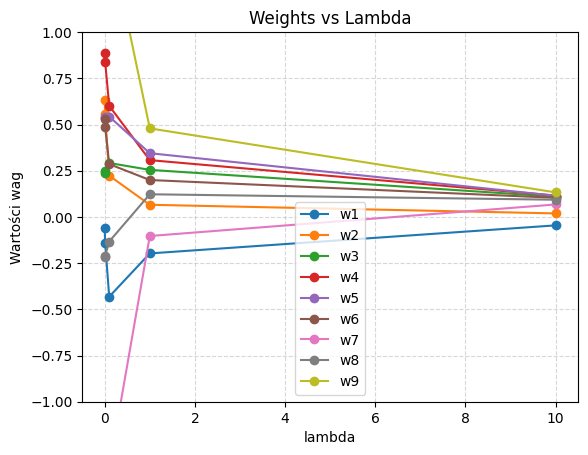

In [7]:
weights_results_df[["w1", "w2", "w3", "w4", "w5", "w6", "w7", "w8", "w9"]].plot(marker='o', title="Weights vs Lambda")
plt.xlabel("lambda")
plt.ylabel("Wartości wag")
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Experiment 2: Lambda vs overfitting

In [8]:
lambdas = [0.0, 0.01, 0.1, 1.0, 10]
r2_scores = []

In [9]:
for lambda_ in lambdas:
    model = LinearRegression(epochs=10000, solver='gd', lambda_=lambda_)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2_score = model.r2_score(y_test, y_pred)
    r2_scores.append(r2_score)

In [10]:
results_df = pd.DataFrame({
    "lambda": lambdas,
    "R2": r2_scores
})

D:\Users\kaczyde26\AppData\Local\Temp\ipykernel_14332\2421511955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="lambda", y="R2", data=results_df, palette="viridis")


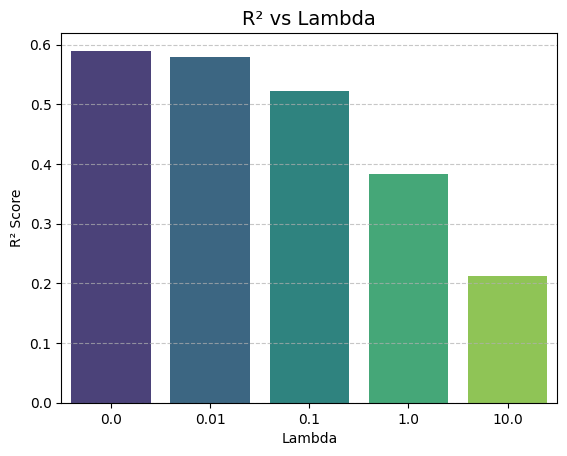

In [11]:
import seaborn as sns

sns.barplot(x="lambda", y="R2", data=results_df, palette="viridis")
plt.title("R² vs Lambda", fontsize=14)
plt.xlabel("Lambda")
plt.ylabel("R² Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Experiment 3: Ridge vs Lasso R2

In [12]:
lambdas = [0.0, 0.01, 0.1, 1.0, 10]
ridge_r2_scores = []
lasso_r2_scores = []

In [21]:
for lambda_ in lambdas:
    model = LinearRegression(epochs=10000, solver='gd', lambda_=lambda_, penalty='l2')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2_score = model.r2_score(y_test, y_pred)
    ridge_r2_scores.append(r2_score)

for lambda_ in lambdas:
    model = LinearRegression(epochs=10000, solver='gd', lambda_=lambda_, penalty='l1')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2_score = model.r2_score(y_test, y_pred)
    lasso_r2_scores.append(r2_score)

In [ ]:
results_df = pd.DataFrame({
    "lambda": lambdas,
    "Ridge R2": ridge_r2_scores,
    "Lasso R2": lasso_r2_scores
})

results_df.set_index("lambda", inplace=True)

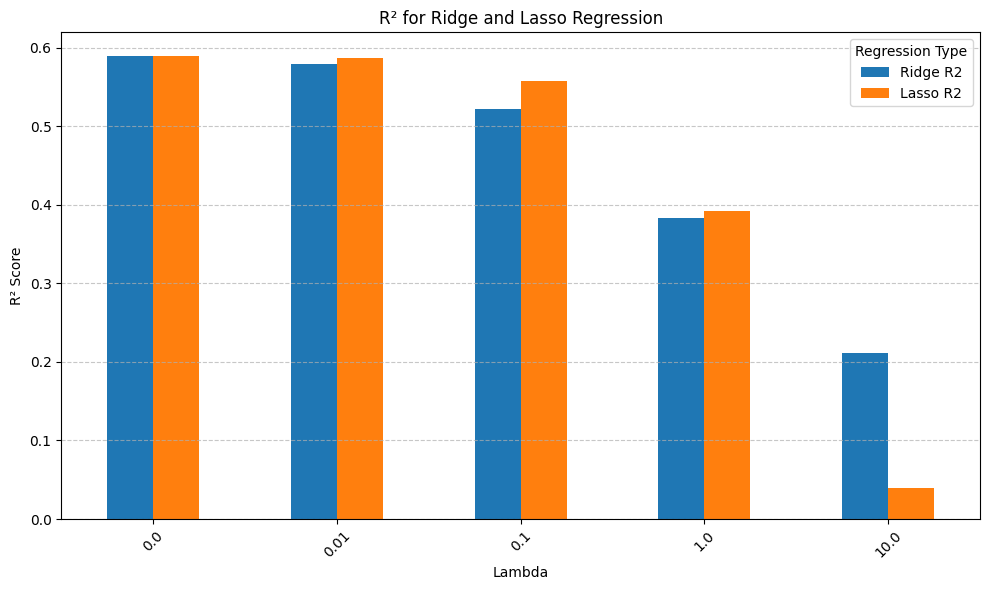

In [29]:
subplots = results_df.plot(kind='bar', figsize=(10, 6), rot=0)
subplots.set_title("R² for Ridge and Lasso Regression")
subplots.set_xlabel("Lambda")
subplots.set_ylabel("R² Score")
plt.xticks(rotation=45)
plt.legend(title='Regression Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Experiment 4: 